In [1]:
# necessary anomaly imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from anomaly_intervalsStream import *
from anomaly8 import *

In [2]:
# necessary anomaly imports
from stream import Stream
import arff

# replace filepath with local filepath for data
ECG1 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_1.arff')
ECG2 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_13.arff')
ECG3 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_15.arff')
#ECG1.to_arff(start=3500, end=6500)

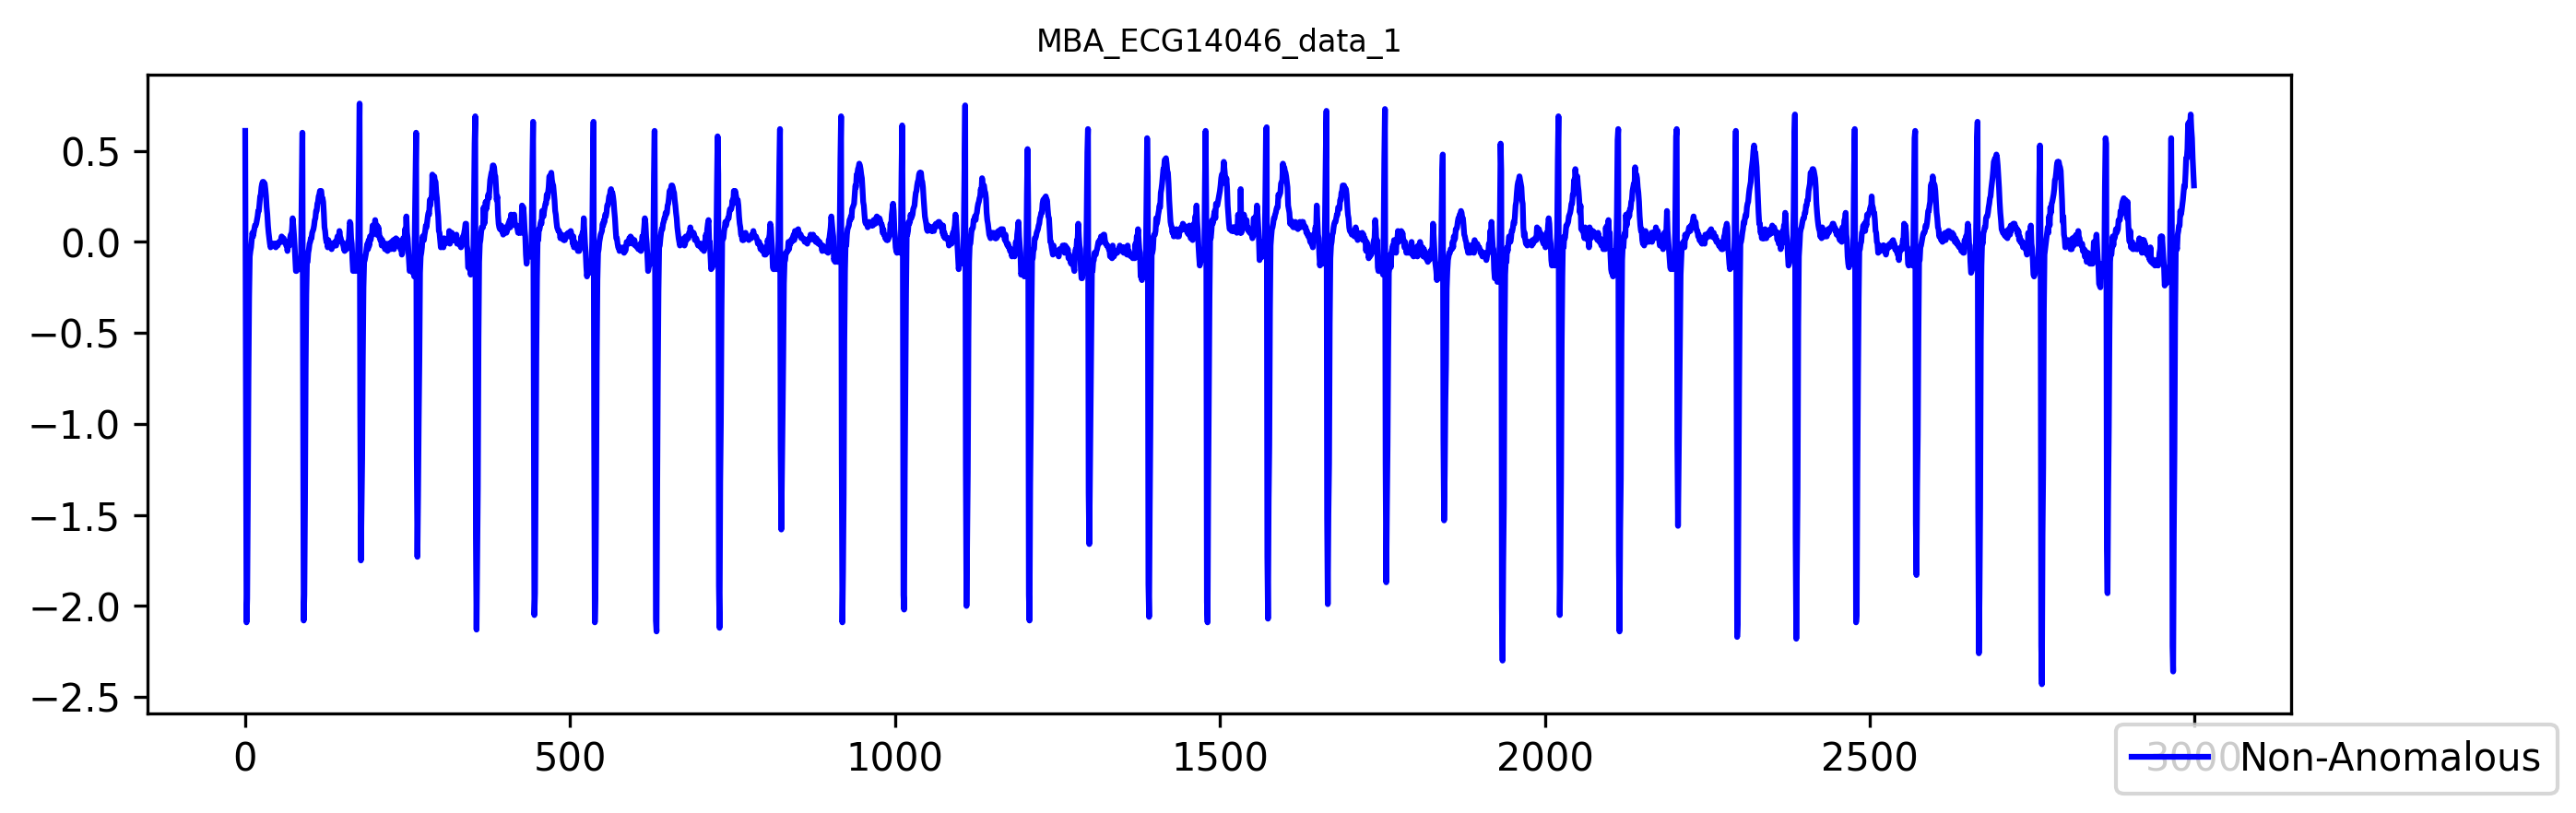

In [3]:
ECGtest = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/util/MBA_ECG14046_data_1.arff')
ECGtest.plot()

In [4]:
# plotting second dataset
anomaly_addition_1 = createAnomalyIntervals(ECGtest)


<class 'numpy.ndarray'> 3000
<class 'numpy.ndarray'> 3000


In [5]:
# creating point anomaly module with uniform distribution of values
pDistAnom1 = PointAnomaly(0.02, 'uniform', num_values=100, lowerbound=-1, upperbound=1) 
# creating point anomaly module with gaussian distribution of values
pDistAnom2 = PointAnomaly(0.003, distribution='gaussian', mu=0.7, std=0.9, num_values=20)
# creating point anomaly module with skew distribution of values
pDistAnom3 = PointAnomaly(0.01, 'skew', upperbound=2, skew=0.1)


In [6]:
ECGtestanomalies = createAnomalyIntervals(ECGtest)




<class 'numpy.ndarray'> 3000
<class 'numpy.ndarray'> 3000


In [ ]:
ECG1 = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG806_data.out')
anomaly_addition_3 = createAnomalyIntervals(ECG1.iloc[0:max_length, :])

# creating point anomaly module with uniform distribution of values
pCollAnom1 = CollectiveAnomaly(30, 0.1, upperbound=0.9, lowerbound=0, num_values=50)
# creating point anomaly module with gaussian distribution of values
pCollAnom2 = CollectiveAnomaly(10, 0.02, upperbound=2, lowerbound=0.5, num_values=200)
# creating point anomaly module with skew distribution of values
pCollAnom3 = CollectiveAnomaly(100, 0.05, num_values=50, distribution='gaussian', mu=0.1, std=0.2)
#correlation step (going down at an incremental factor) - linear if percentage of added noise exceeds bound, keep at bound
# vary the length of anomalies (bound would be range of additive)
anomaly_addition_3.create_intervals(3,5000)
# add drift modules here corresponding to intervals
anomaly_addition_3.add_anomalies(pCollAnom1, pCollAnom2, pCollAnom3)

anomaly_addition_3.plot_dataset()


# IMPLEMENT BY ADDING NOISE TO EACH SEQUENCE

NameError: name 'pd' is not defined

In [ ]:
ECG1 = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG806_data.out')
anomaly_addition_4 = createAnomalyIntervals(ECG1.iloc[0: max_length, :])
anomaly_addition_4.create_intervals(3,5000)
# creating sequential anomalies
pSeqAnom1 = SequentialAnomaly(0.10, 0.3, 3, length=15)

pSeqAnom2 = SequentialAnomaly(0.05, 0.5,1, length=30)

pSeqAnom3 = SequentialAnomaly(0.1, 0.1,1, length=50)

# add drift modules here corresponding to intervals
anomaly_addition_4.add_anomalies(pSeqAnom1, pSeqAnom2, pSeqAnom3)

anomaly_addition_4.plot_dataset()